In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from collections import defaultdict,Counter
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.util import ngrams
from statistics import *
import seaborn as sns
from tqdm import tqdm
import textstat
import string
import re
import json
import nltk
import gc

In [3]:
nltk.download('stopwords')
stop=set(stopwords.words('english'))
plt.style.use('seaborn')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/feihuyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
train = pd.read_csv('/Users/feihuyan/Downloads/tweet_sentiment_extraction/train.csv')
test = pd.read_csv('/Users/feihuyan/Downloads/tweet_sentiment_extraction/test.csv')
samp_sub = pd.read_csv('/Users/feihuyan/Downloads/tweet_sentiment_extraction/sample_submission.csv')

In [6]:
train.head(15)

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
5,28b57f3990,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...,neutral
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive
7,50e14c0bb8,Soooo high,Soooo high,neutral
8,e050245fbd,Both of you,Both of you,neutral
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,Wow... u just became cooler.,positive


In [12]:
def text(text):
    text=re.sub(r'https?://www\.\S+\.com','',text)
    text=re.sub(r'[^A-Za-z|\s]','',text)
    return text
df['text'] = df['text'].astype(str).apply(lambda x: text(x))
df['selected_text'] = df['selected_text'].astype(str).apply(lambda x: text(x))

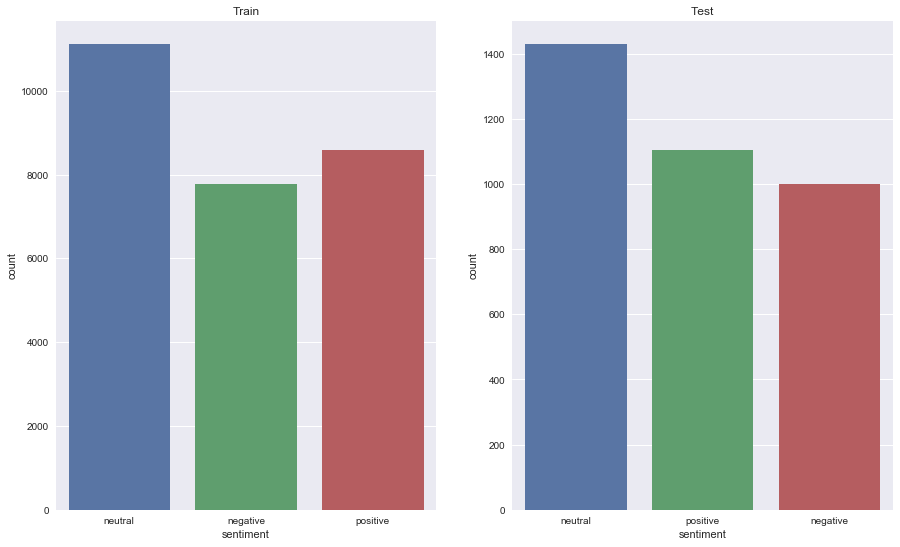

In [10]:
f,ax = plt.subplots(1, 2, figsize=(15,9))
sns.countplot(train['sentiment'], ax=ax[0]).set_title('Train')
sns.countplot(test['sentiment'], ax=ax[1]).set_title('Test')
plt.show()

In [11]:
df=pd.concat([train,test])
df['text']=df['text'].astype(str)
df['selected_text']=df['selected_text'].astype(str)

/Users/feihuyan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


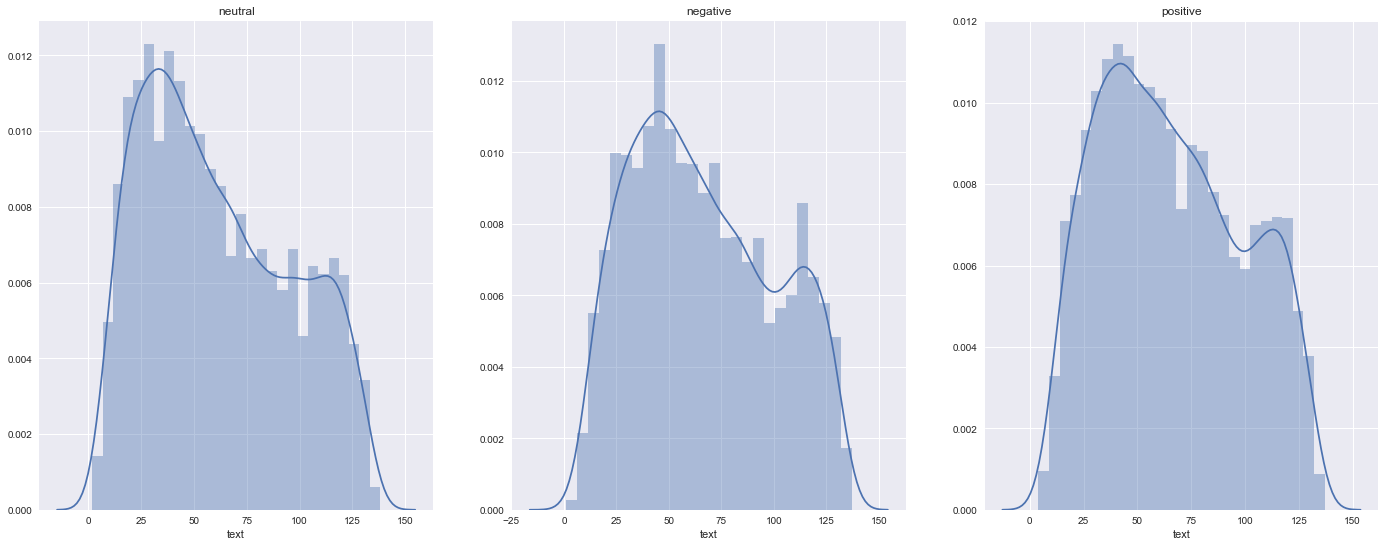

In [13]:
f,ax = plt.subplots(1, 3, figsize=(24,9))
sns.distplot(df[df['sentiment'] == 'neutral']['text'].str.len(),ax=ax[0]).set_title('neutral')
sns.distplot(df[df['sentiment'] == 'negative']['text'].str.len(),ax=ax[1]).set_title('negative')
sns.distplot(df[df['sentiment'] == 'positive']['text'].str.len(),ax=ax[2]).set_title('positive')
plt.show()

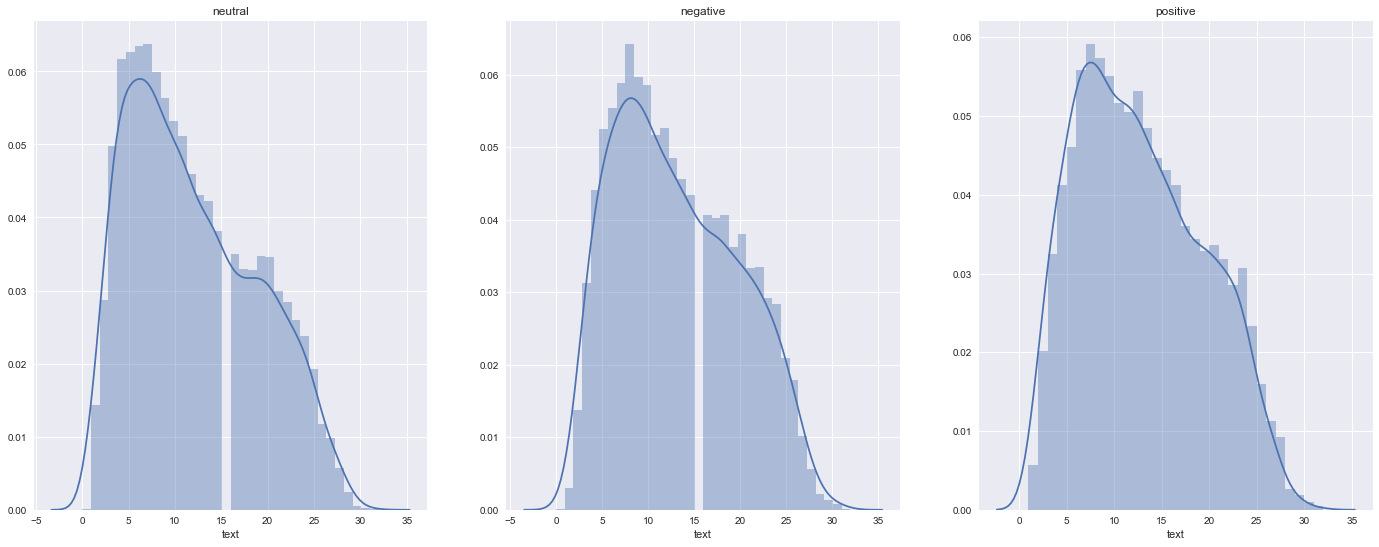

In [14]:
f,ax = plt.subplots(1, 3, figsize=(24,9))
sns.distplot(df[df['sentiment'] == 'neutral']['text'].str.split().str.len(),ax=ax[0]).set_title('neutral')
sns.distplot(df[df['sentiment'] == 'negative']['text'].str.split().str.len(),ax=ax[1]).set_title('negative')
sns.distplot(df[df['sentiment'] == 'positive']['text'].str.split().str.len(),ax=ax[2]).set_title('positive')
plt.show()

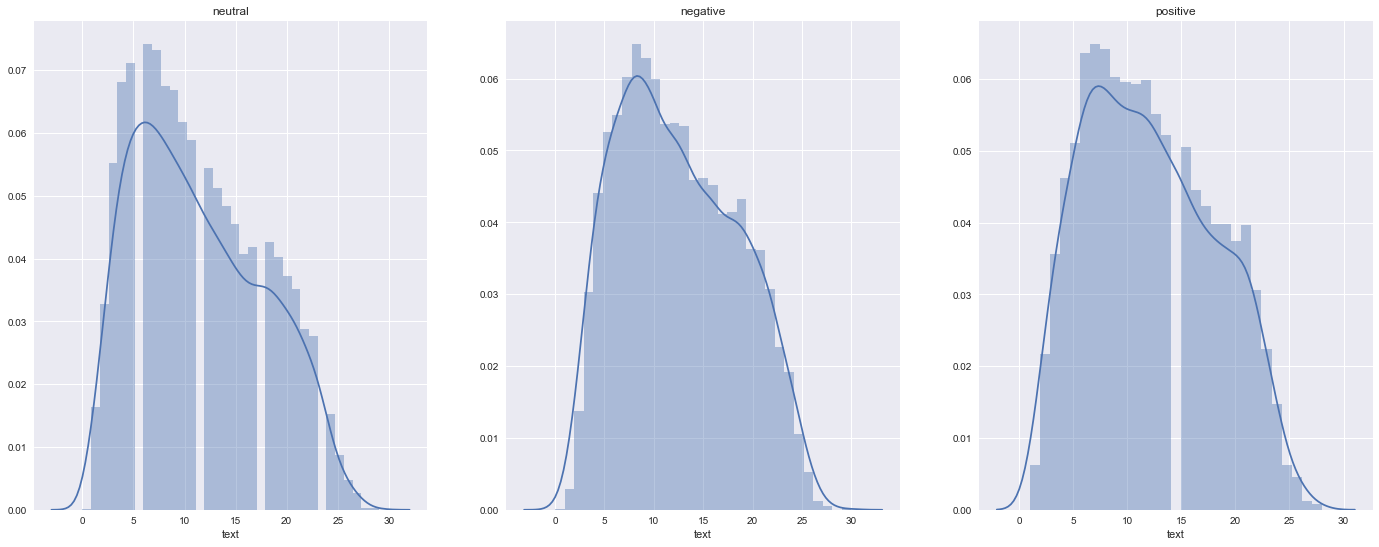

In [15]:
f,ax = plt.subplots(1, 3, figsize=(24,9))
sns.distplot(df[df['sentiment'] == 'neutral']['text'].astype(str).map(lambda x: len(set(x.split()))),ax=ax[0]).set_title('neutral')
sns.distplot(df[df['sentiment'] == 'negative']['text'].astype(str).map(lambda x: len(set(x.split()))),ax=ax[1]).set_title('negative')
sns.distplot(df[df['sentiment'] == 'positive']['text'].astype(str).map(lambda x: len(set(x.split()))),ax=ax[2]).set_title('positive')
plt.show()

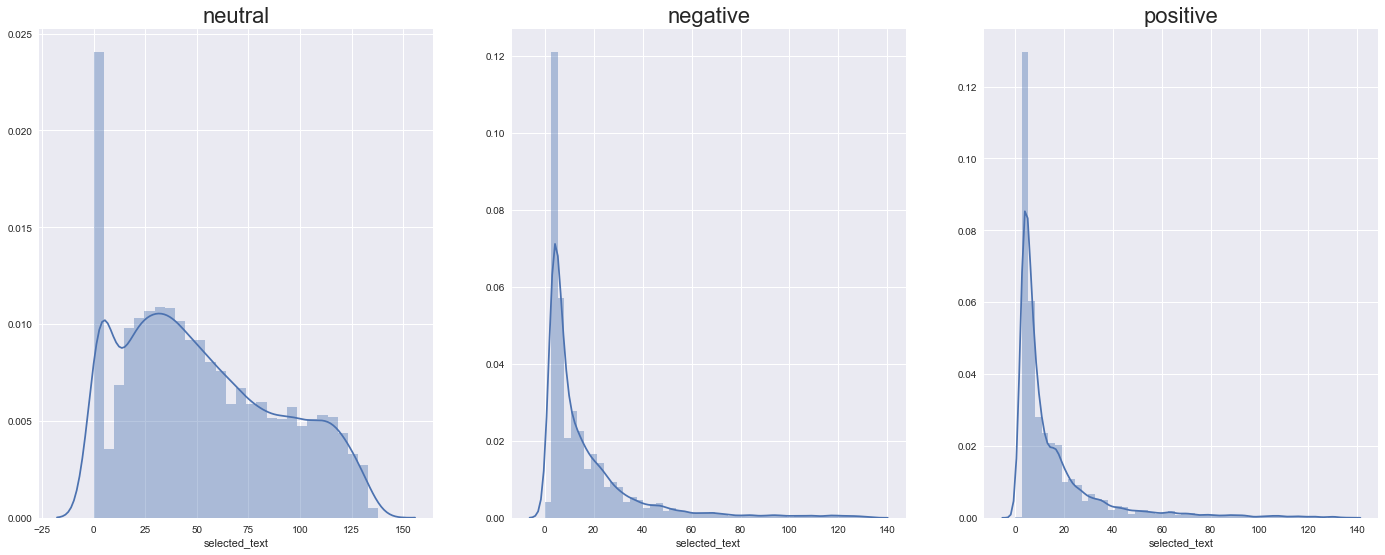

In [18]:
f,ax = plt.subplots(1, 3, figsize=(24,9))
sns.distplot(df[df['sentiment'] == 'neutral']['selected_text'].dropna().str.len(),ax=ax[0]).set_title('Neutral', fontsize=22)
sns.distplot(df[df['sentiment'] == 'negative']['selected_text'].dropna().str.len(),ax=ax[1]).set_title('Negative', fontsize=22)
sns.distplot(df[df['sentiment'] == 'positive']['selected_text'].dropna().str.len(),ax=ax[2]).set_title('Positive', fontsize=22)
plt.show()

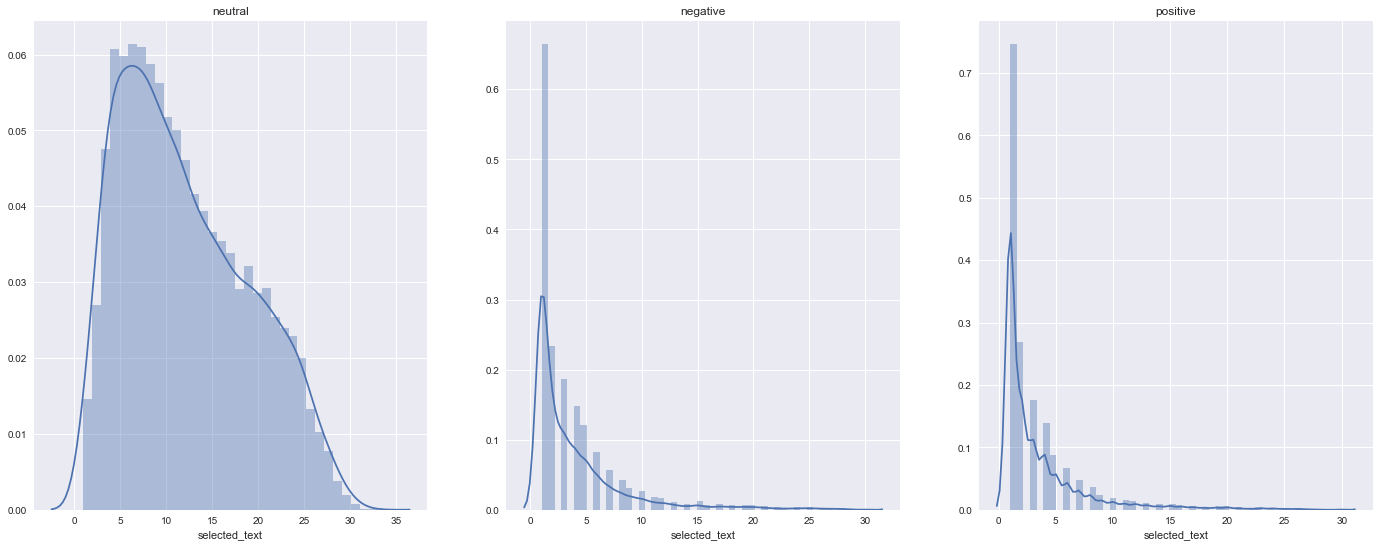

In [38]:
f,ax = plt.subplots(1, 3, figsize=(24,9))
sns.distplot(df[df['sentiment'] == 'neutral']['selected_text'].dropna().str.split().str.len(),ax=ax[0]).set_title('neutral')
sns.distplot(df[df['sentiment'] == 'negative']['selected_text'].dropna().str.split().str.len(),ax=ax[1]).set_title('negative')
sns.distplot(df[df['sentiment'] == 'positive']['selected_text'].dropna().str.split().str.len(),ax=ax[2]).set_title('positive')
plt.show()

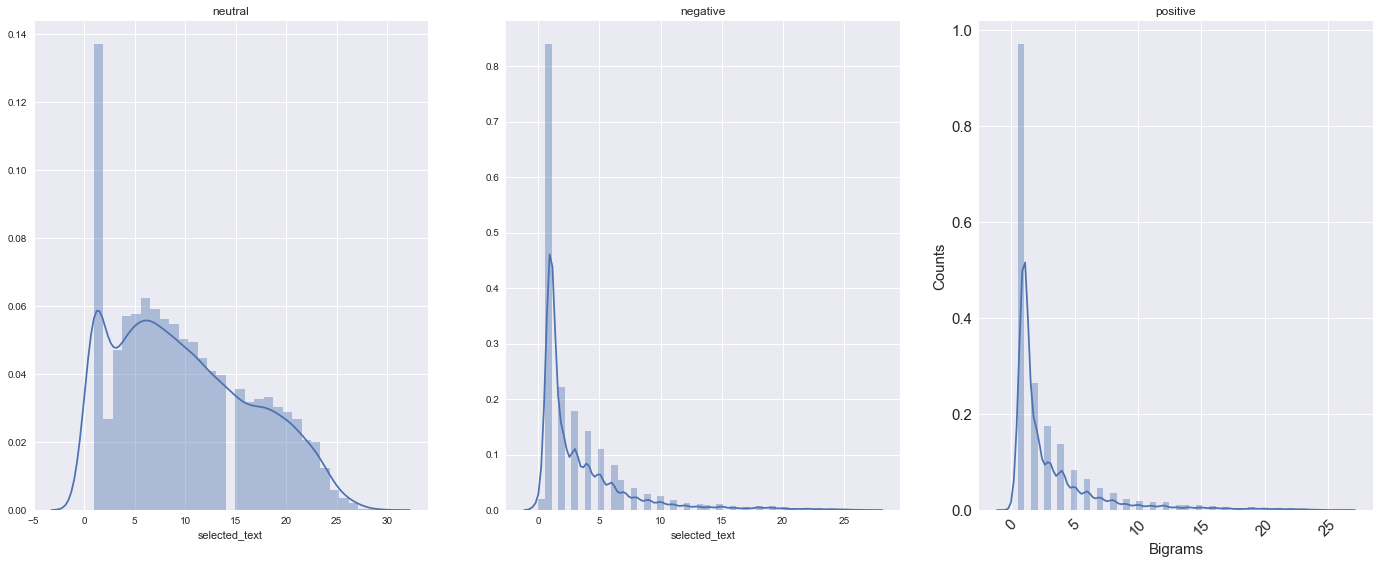

In [19]:
f,ax = plt.subplots(1, 3, figsize=(24,9))
sns.distplot(df[df['sentiment'] == 'neutral']['selected_text'].astype(str).map(lambda x: len(set(x.split()))),ax=ax[0]).set_title('neutral')
sns.distplot(df[df['sentiment'] == 'negative']['selected_text'].astype(str).map(lambda x: len(set(x.split()))),ax=ax[1]).set_title('negative')
sns.distplot(df[df['sentiment'] == 'positive']['selected_text'].astype(str).map(lambda x: len(set(x.split()))),ax=ax[2]).set_title('positive')
plt.xlabel("Bigrams",fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("Counts",fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(rotation=45)
plt.show()

In [21]:
neu_corp = []
lemmer = WordNetLemmatizer()
neutral_df = df[df['sentiment'] =='neutral']
for text in neutral_df['text']:
    words = [w for w in word_tokenize(text) if (w not in stop)]
    words = [lemmer.lemmatize(w) for w in words if(len(w)>2)]
    neu_corp.append(words)

neu_corp=[word for l in neu_corp for word in l]

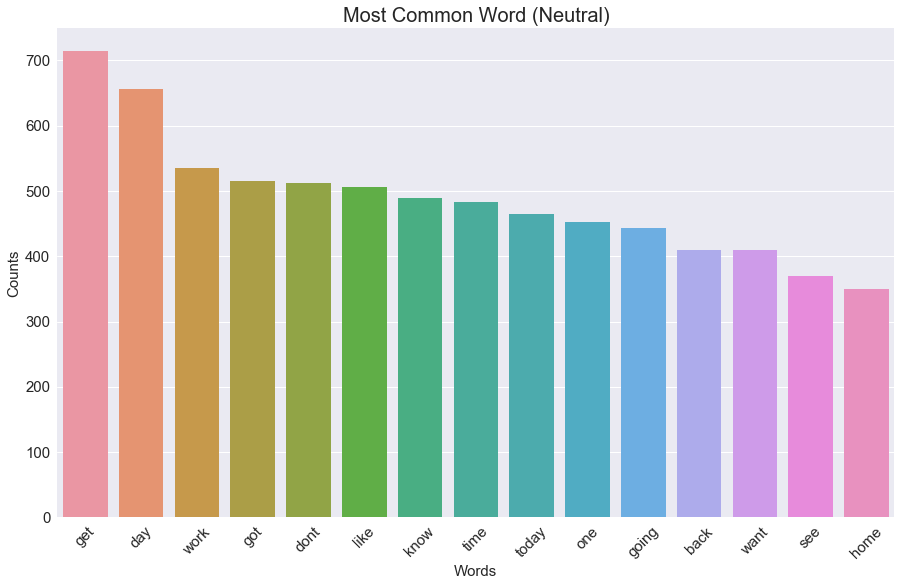

In [24]:
counter = Counter(neu_corp)
neutral_com = counter.most_common()
word = []
count = []
for com_word, word_count in neutral_com:
    if com_word not in stop:
        word.append(com_word)
        count.append(word_count)
plt.figure(figsize=(15,9))
sns.barplot(word[:15], count[:15]).set_title('Most Common Word (Neutral)', fontsize=20)
plt.xlabel("Words",fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("Counts",fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(rotation=45)
plt.show();

In [25]:
neg_corp = []
lemmer = WordNetLemmatizer()
neg_df = df[df['sentiment'] =='negative']
for text in neg_df['text']:
    words = [w for w in word_tokenize(text) if (w not in stop)]
    words = [lemmer.lemmatize(w) for w in words if(len(w)>2)]
    neg_corp.append(words)

neg_corp=[word for l in neg_corp for word in l]

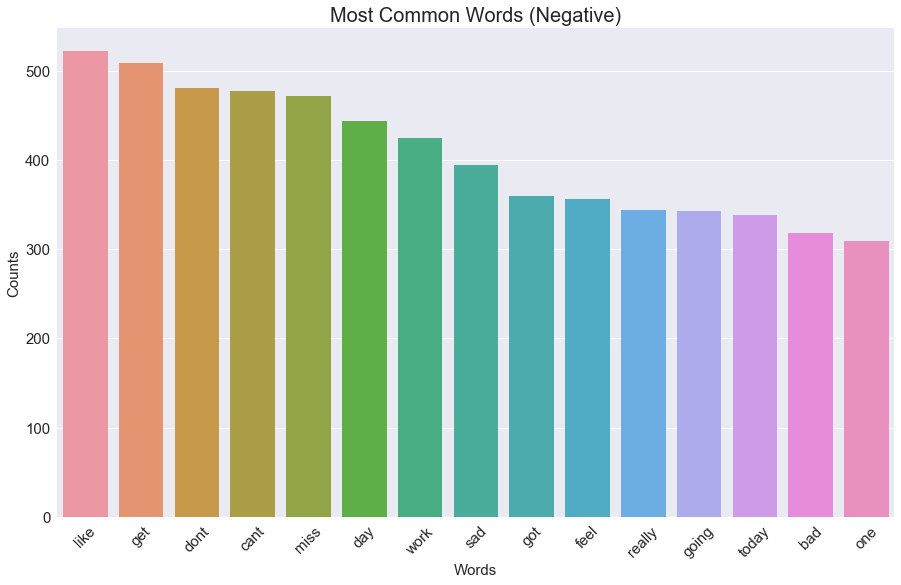

In [28]:
counter = Counter(neg_corp)
neg_com = counter.most_common()
word = []
count = []
for com_word, word_count in neg_com:
    if com_word not in stop:
        word.append(com_word)
        count.append(word_count)
plt.figure(figsize=(15,9))
sns.barplot(word[:15], count[:15]).set_title('Most Common Words (Negative)',fontsize=20)
plt.xlabel("Words",fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("Counts",fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(rotation=45)
plt.show();

In [29]:
pos_corp = []
lemmer = WordNetLemmatizer()
pos_df = df[df['sentiment'] =='positive']
for text in pos_df['text']:
    words = [w for w in word_tokenize(text) if (w not in stop)]
    words = [lemmer.lemmatize(w) for w in words if(len(w)>2)]
    pos_corp.append(words)

pos_corp=[word for l in pos_corp for word in l]

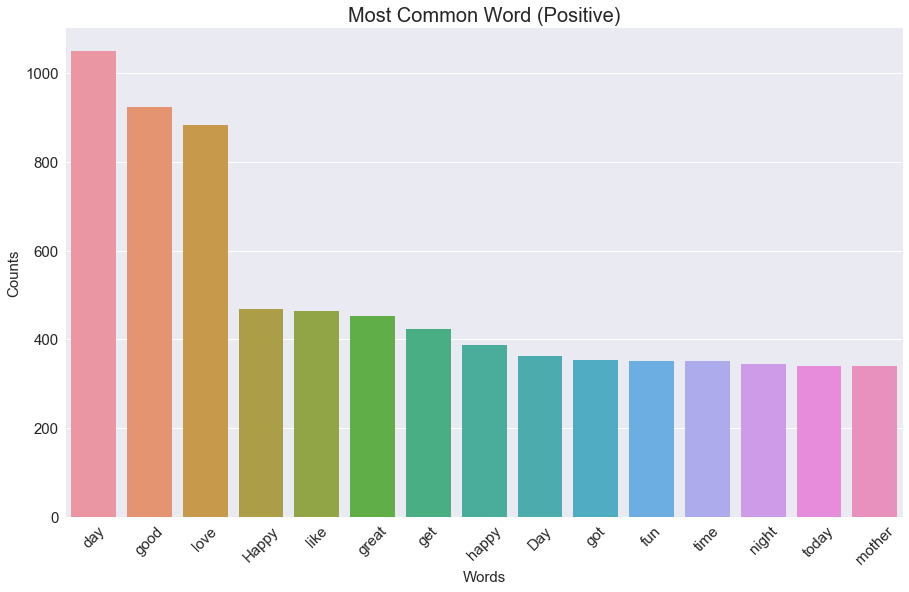

In [30]:
counter = Counter(pos_corp)
pos_com = counter.most_common()
word = []
count = []
for com_word, word_count in pos_com:
    if com_word not in stop:
        word.append(com_word)
        count.append(word_count)
plt.figure(figsize=(15,9))
sns.barplot(word[:15], count[:15]).set_title('Most Common Word (Positive)',fontsize=20)
plt.xlabel("Words",fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("Counts",fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(rotation=45)
plt.show();

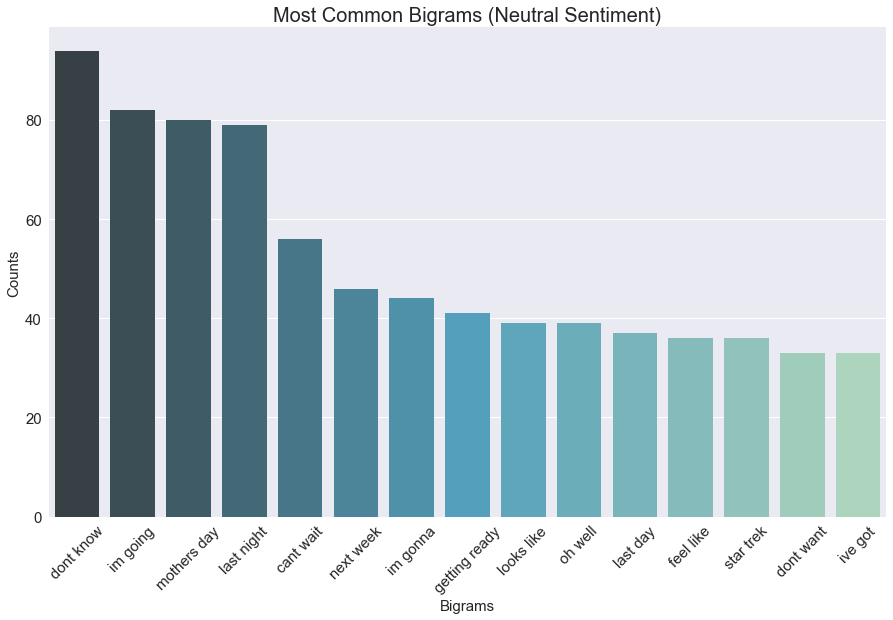

In [134]:
vec = CountVectorizer(ngram_range=(2, 2),stop_words=stop).fit(neutral_df['text'])
bag_of_words = vec.transform(neutral_df['text'])
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
x,y=map(list,zip(*words_freq))
plt.figure(figsize=(15,9))
sns.barplot(x[:15],y[:15],palette="GnBu_d").set_title('Most Common Bigrams (Neutral Sentiment)',fontsize=20)
plt.xlabel("Bigrams",fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("Counts",fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(rotation=45);

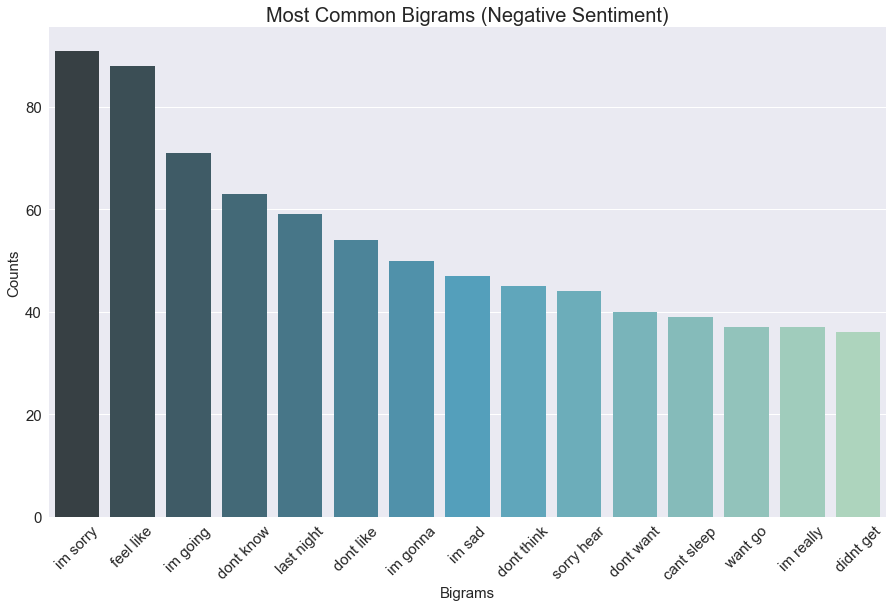

In [133]:
vec = CountVectorizer(ngram_range=(2, 2),stop_words=stop).fit(neg_df['text'])
bag_of_words = vec.transform(neg_df['text'])
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
x,y=map(list,zip(*words_freq))
plt.figure(figsize=(15,9))
sns.barplot(x[:15],y[:15],palette="GnBu_d").set_title('Most Common Bigrams (Negative Sentiment)', fontsize=20)
plt.xlabel("Bigrams",fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("Counts",fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(rotation=45);

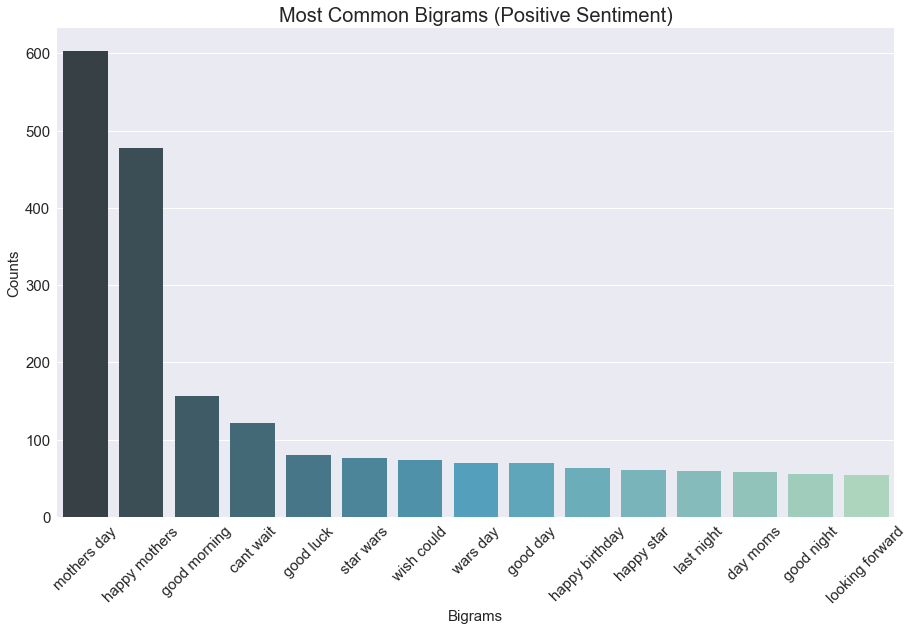

In [132]:
vec = CountVectorizer(ngram_range=(2, 2),stop_words=stop).fit(pos_df['text'])
bag_of_words = vec.transform(pos_df['text'])
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
x,y=map(list,zip(*words_freq))
plt.figure(figsize=(15,9))
sns.barplot(x[:15],y[:15],palette="GnBu_d").set_title('Most Common Bigrams (Positive Sentiment)', fontsize=20)
plt.xlabel("Bigrams",fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("Counts",fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(rotation=45);

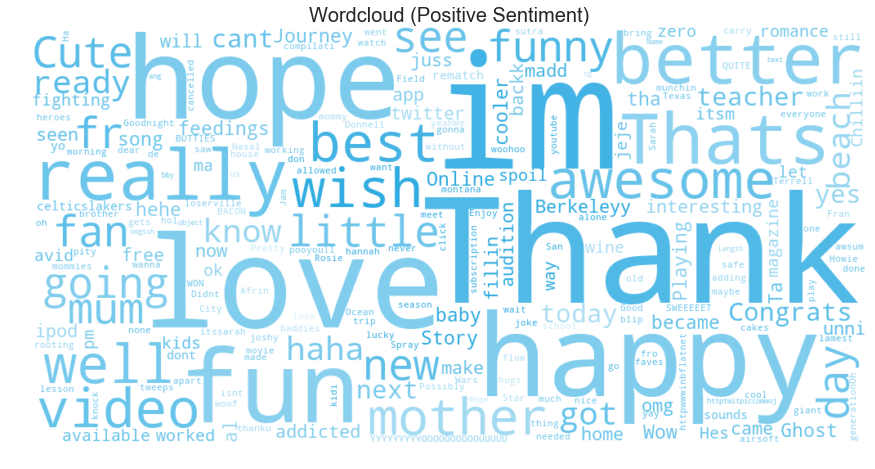

<Figure size 576x396 with 0 Axes>

In [131]:
from PIL import Image
from wordcloud import ImageColorGenerator
stopwords = set(STOPWORDS)
mask = np.array(Image.open('/Users/feihuyan/Downloads/twitter-moments.jpg'))
wordcloud_pos = WordCloud(stopwords=stopwords, background_color="white", max_words=1000, mask=mask).generate(str(pos_df['text']))
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[15,12])
plt.imshow(wordcloud_pos.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")   
plt.title('Wordcloud (Positive Sentiment)', fontsize=20)
plt.show() 
plt.savefig("/Users/feihuyan/Downloads/Twitter_project/word_cloud_pos.jpeg", format="png")

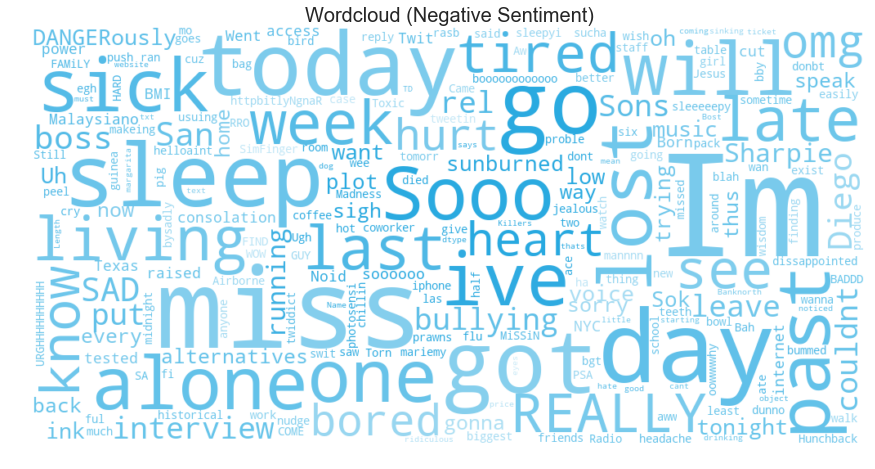

<Figure size 576x396 with 0 Axes>

In [130]:
wordcloud_neg = WordCloud(stopwords=stopwords, background_color="white", max_words=1000, mask=mask).generate(str(neg_df['text']))
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[15,12])
plt.imshow(wordcloud_neg.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")   
plt.title('Wordcloud (Negative Sentiment)', fontsize=20)
plt.show()    
plt.savefig("/Users/feihuyan/Downloads/Twitter_project/word_cloud_neg.jpeg", format="png")

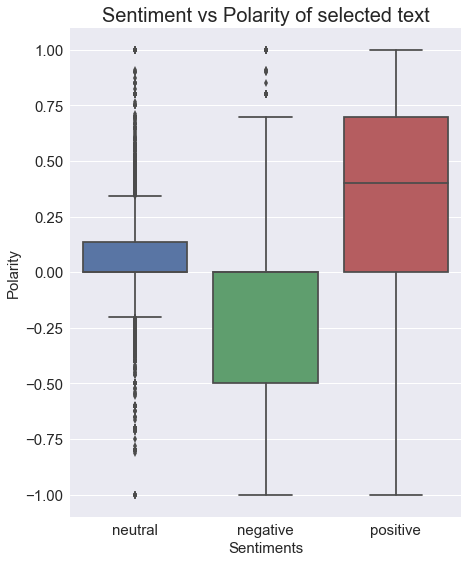

In [33]:
def get_sent(text):
    testimonial = TextBlob(str(text))
    return testimonial.sentiment.polarity

plt.figure(figsize=(7,9))
train['polarity']=train['selected_text'].apply(lambda x : get_sent(x))
sns.boxplot(x='sentiment', y='polarity', data=train)
plt.gca().set_title('Sentiment vs Polarity of selected text',fontsize=20)
plt.xlabel("Sentiments",fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("Polarity",fontsize=15)
plt.yticks(fontsize=15)
plt.show()

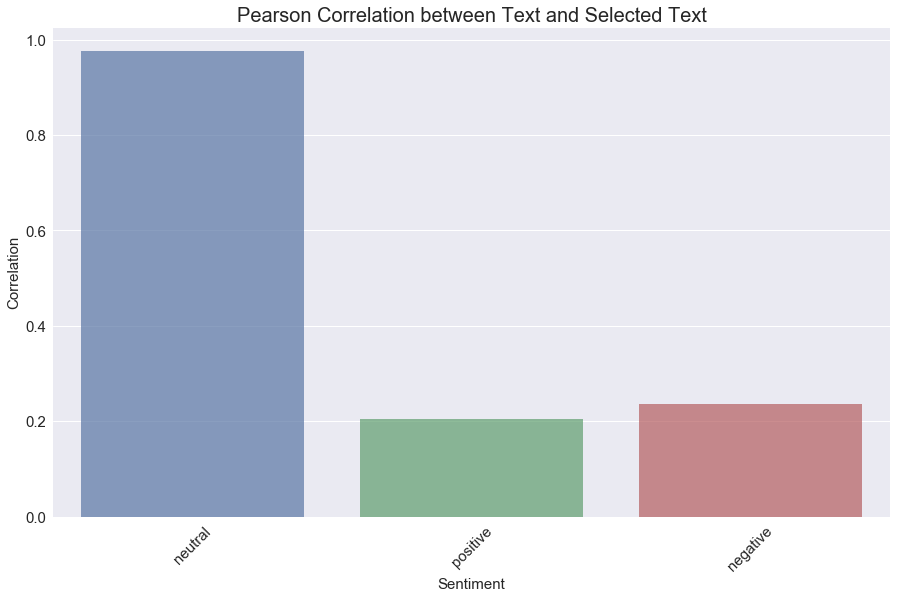

In [141]:
import scipy
corr=[]
for i in sent:
    text_pos=train[train['sentiment']==i]['text'].astype(str).map(lambda x : len(x.split()))
    sel_pos=train[train['sentiment']==i]['selected_text'].astype(str).map(lambda x : len(x.split()))
    corr.append(scipy.stats.pearsonr(text_pos,sel_pos)[0])
plt.figure(figsize=(15,9))
sns.barplot(sent,corr,alpha=.7)
plt.gca().set_title("Pearson Correlation between Text and Selected Text",fontsize=20)
plt.gca().set_ylabel("Correlation", fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel("Sentiment",fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(rotation=45);

In [216]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tqdm import tqdm
from sklearn.model_selection import StratifiedKFold
from transformers import *
import tokenizers

In [218]:
MAXLEN=128
tokenizer=tokenizers.ByteLevelBPETokenizer('/Users/feihuyan/Downloads/vocab.txt',lowercase=True)
sentiment_id = {'positive': 1313, 'negative': 2430, 'neutral': 7974}
train = pd.read_csv('/Users/feihuyan/Downloads/tweet_sentiment_extraction/train.csv').fillna('')

In [219]:
ct=train.shape[0]
input_ids=np.ones((ct,MAXLEN),dtype='int32')
attention_mask=np.zeros((ct,MAXLEN),dtype='int32')
token_type_ids=np.zeros((ct,MAXLEN),dtype='int32')
start_tokens=np.zeros((ct,MAXLEN),dtype='int32')
end_tokens=np.zeros((ct,MAXLEN),dtype='int32')


for k in tqdm(range(ct)):
    
    text1=" "+" ".join(train.loc[k,"text"].split())
    text2=" ".join(train.loc[k,"selected_text"].split())
    idx=text1.find(text2)
    chars=np.zeros(len(text1))
    chars[idx:idx+len(text2)]=1
    if (text1[idx-1]==" "):
        chars[idx-1]=1
    enc=tokenizer.encode(text1)
    
    offsets=enc.offsets
    
    toks=[]
    for i,(a,b) in enumerate(offsets):
        sm=np.sum(chars[a:b])
        if sm > 0:
            toks.append(i)
            
    s_tok = sentiment_id[train.loc[k,'sentiment']]
    input_ids[k,:len(enc.ids)+5] = [0] + enc.ids + [2,2] + [s_tok] + [2]
    attention_mask[k,:len(enc.ids)+5] = 1
    if len(toks)>0:
        start_tokens[k,toks[0]+1] = 1
        end_tokens[k,toks[-1]+1] = 1

100%|██████████| 27481/27481 [00:03<00:00, 7105.98it/s]


In [220]:
test = pd.read_csv('/Users/feihuyan/Downloads/tweet_sentiment_extraction/train.csv').fillna('')

ct = test.shape[0]
input_ids_t = np.ones((ct,MAXLEN),dtype='int32')
attention_mask_t = np.zeros((ct,MAXLEN),dtype='int32')
token_type_ids_t = np.zeros((ct,MAXLEN),dtype='int32')

for k in tqdm(range(test.shape[0])):
        
    # INPUT_IDS
    text1 = " "+" ".join(test.loc[k,'text'].split())
    enc = tokenizer.encode(text1)                
    s_tok = sentiment_id[test.loc[k,'sentiment']]
    input_ids_t[k,:len(enc.ids)+5] = [0] + enc.ids + [2,2] + [s_tok] + [2]
    attention_mask_t[k,:len(enc.ids)+5] = 1

100%|██████████| 27481/27481 [00:03<00:00, 8402.98it/s]


In [223]:
def build_model():
    ids = tf.keras.layers.Input((MAXLEN,), dtype=tf.int32)
    att = tf.keras.layers.Input((MAXLEN,), dtype=tf.int32)
    tok = tf.keras.layers.Input((MAXLEN,), dtype=tf.int32)

    config = RobertaConfig.from_pretrained('/Users/feihuyan/Downloads/config-roberta-base.json')
    bert_model = TFRobertaModel.from_pretrained('/Users/feihuyan/Downloads/pretrained-roberta-base.h5',config=config)
    x = bert_model(ids,attention_mask=att,token_type_ids=tok)
    
    x1 = tf.keras.layers.Dropout(0.1)(x[0]) 
    x1 = tf.keras.layers.Conv1D(1,1)(x1)
    x1 = tf.keras.layers.Flatten()(x1)
    x1 = tf.keras.layers.Activation('softmax')(x1)
    
    x2 = tf.keras.layers.Dropout(0.1)(x[0]) 
    x2 = tf.keras.layers.Conv1D(1,1)(x2)
    x2 = tf.keras.layers.Flatten()(x2)
    x2 = tf.keras.layers.Activation('softmax')(x2)

    model = tf.keras.models.Model(inputs=[ids, att, tok], outputs=[x1,x2])
    optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer)

    return model

In [230]:
def jaccard(str1, str2): 
    a = set(str1.lower().split()) 
    b = set(str2.lower().split())
    if (len(a)==0) & (len(b)==0): return 0.5
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

In [225]:
model=build_model()

All model checkpoint weights were used when initializing TFRobertaModel.

All the weights of TFRobertaModel were initialized from the model checkpoint at /Users/feihuyan/Downloads/pretrained-roberta-base.h5.
If your task is similar to the task the model of the ckeckpoint was trained on, you can already use TFRobertaModel for predictions without further training.


In [227]:
import os
models=os.listdir("/Users/feihuyan/Downloads/Twitter_project")
model_file_path="/Users/feihuyan/Downloads/Twitter_project/"

In [231]:
jac = []; VER='v0'; DISPLAY=1 # USE display=1 FOR INTERACTIVE
oof_start = np.zeros((input_ids.shape[0],MAX_LEN))
oof_end = np.zeros((input_ids.shape[0],MAX_LEN))
preds_start = np.zeros((input_ids_t.shape[0],MAX_LEN))
preds_end = np.zeros((input_ids_t.shape[0],MAX_LEN))

skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=777)
for fold,(idxT,idxV) in enumerate(skf.split(input_ids,train.sentiment.values)):

    print('#'*25)
    print('### FOLD %i'%(fold+1))
    print('#'*25)
    
    K.clear_session()
    model = build_model()
        
    sv = tf.keras.callbacks.ModelCheckpoint(
        '%s-roberta-%i.h5'%(VER,fold), monitor='val_loss', verbose=1, save_best_only=True,
        save_weights_only=True, mode='auto', save_freq='epoch')
        
    model.fit([input_ids[idxT,], attention_mask[idxT,], token_type_ids[idxT,]], [start_tokens[idxT,], end_tokens[idxT,]], 
        epochs=3, batch_size=32, verbose=DISPLAY, callbacks=[sv],
        validation_data=([input_ids[idxV,],attention_mask[idxV,],token_type_ids[idxV,]], 
        [start_tokens[idxV,], end_tokens[idxV,]]))
    
    print('Loading model...')
    model.load_weights('%s-roberta-%i.h5'%(VER,fold))
    
    print('Predicting OOF...')
    oof_start[idxV,],oof_end[idxV,] = model.predict([input_ids[idxV,],attention_mask[idxV,],token_type_ids[idxV,]],verbose=DISPLAY)
    
    print('Predicting Test...')
    preds = model.predict([input_ids_t,attention_mask_t,token_type_ids_t],verbose=DISPLAY)
    preds_start += preds[0]/skf.n_splits
    preds_end += preds[1]/skf.n_splits
    
    # DISPLAY FOLD JACCARD
    all = []
    for k in idxV:
        a = np.argmax(oof_start[k,])
        b = np.argmax(oof_end[k,])
        if a>b: 
            st = train.loc[k,'text'] # IMPROVE CV/LB with better choice here
        else:
            text1 = " "+" ".join(train.loc[k,'text'].split())
            enc = tokenizer.encode(text1)
            st = tokenizer.decode(enc.ids[a-1:b])
        all.append(jaccard(st,train.loc[k,'selected_text']))
    jac.append(np.mean(all))
    print('>>>> FOLD %i Jaccard ='%(fold+1),np.mean(all))
    print()

#########################
### FOLD 1
#########################


All model checkpoint weights were used when initializing TFRobertaModel.

All the weights of TFRobertaModel were initialized from the model checkpoint at /Users/feihuyan/Downloads/pretrained-roberta-base.h5.
If your task is similar to the task the model of the ckeckpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Train on 21983 samples, validate on 5498 samples
Epoch 1/3
  192/21983 [..............................] - ETA: 4:51:11 - loss: 0.0000e+00 - activation_loss: 0.0000e+00 - activation_1_loss: 0.0000e+00

KeyboardInterrupt: 

In [179]:
def get_model_out_path(sentiment):
    '''
    Returns Model output path
    '''
    model_out_path = None
    if sentiment == 'positive':
        model_out_path = 'models/model_pos'
    elif sentiment == 'negative':
        model_out_path = 'models/model_neg'
    return model_out_path